In [1]:
import pandas as pd

In [2]:
df =pd.read_csv('DataSets//laptop.csv')

In [3]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [4]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Name', 'Price', 'Processor_Name',
       'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz',
       'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter',
       'Battery_Life'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,9,2194,92,122,16,9,13,3,11,1,3,180,5,16,7,30,14
1,1,15,3035,379,23,13,1,17,4,25,0,25,220,0,14,7,48,9
2,2,6,1417,1194,82,15,4,1,6,23,0,25,84,8,14,7,40,0
3,3,9,2119,812,82,15,8,17,4,26,0,25,192,4,14,7,67,180
4,4,12,2659,73,66,15,9,18,11,8,0,25,287,4,14,7,30,65


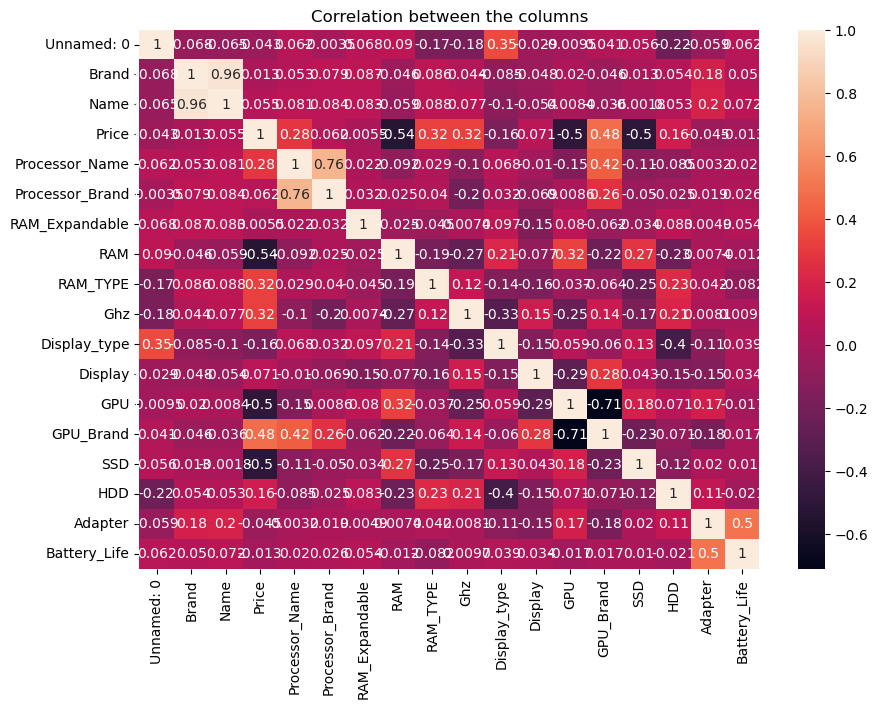

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(10,7))
# sns.heatmap(df_encoded.drop('customer_id', axis=1).corr(), annot=True)
sns.heatmap(df_encoded.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [7]:
X = df_encoded.drop(['Unnamed: 0', 'Name', 'Price', 'RAM', 'GPU', 'SSD'], axis=1)
y = df_encoded['Price']

X.head()

,Brand,Processor_Name,Processor_Brand,RAM_Expandable,RAM_TYPE,Ghz,Display_type,Display,GPU_Brand,HDD,Adapter,Battery_Life
0,9,122,16,9,3,11,1,3,5,7,30,14
1,15,23,13,1,4,25,0,25,0,7,48,9
2,6,82,15,4,6,23,0,25,8,7,40,0
3,9,82,15,8,4,26,0,25,4,7,67,180
4,12,66,15,9,11,8,0,25,4,7,30,65


In [8]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (3976, 12)
Shape of y is:  (3976,)


In [9]:
from sklearn import tree
DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X, y)

DecisionTreeClassifier()

In [10]:
DT_pred = DT_model.predict([[9,	122, 16, 9,	3, 11, 1, 3, 5, 7, 30, 14]])
DT_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([92], dtype=int64)

In [11]:
DT_model.score(X,y)

0.8594064386317908

In [26]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=50)

In [27]:
RF_model.fit(X, y)

RandomForestClassifier(n_estimators=50)

In [28]:
RF_pred = RF_model.predict([[9,	122, 16, 9,	3, 11, 1, 3, 5, 7, 30, 14]])
RF_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([92], dtype=int64)

In [29]:
RF_model.score(X,y)

0.8594064386317908

In [16]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor()

In [17]:
RF_regressor.fit(X, y)

RandomForestRegressor()

In [18]:
RF_reg_pred = RF_regressor.predict([[9,	120, 16, 9,	3, 9, 1, 3, 5, 7, 25, 14]])
RF_reg_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([172.32])

In [19]:
RF_regressor.score(X,y)

0.9700654460111329